
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [2]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [7]:
import nltk

# Download the necessary NLTK data if it's not already present
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng.zip')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

sentence = "The quick brown fox jumps over the lazy dog"

# Use NLTK to tokenize and tag the sentence
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN


In [8]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
2. Why do you think 'brown' and 'lazy' have the same tag?
3. Can you guess what 'VBZ' represents?

*Hint: Think about the grammatical role each word plays in the sentence!*


 **‘DT' means Determiner:**

 Determiners are words that introduce a noun phrase and express the definiteness, quantity, or possession of a noun. In your example, 'The' is a determiner.

**'JJ' means Adjective:**

 Adjectives are words that describe or modify nouns.

**Why do 'brown' and 'lazy' have the same tag? **

Both 'brown' and 'lazy' are adjectives. They are both describing qualities of nouns in the sentence: 'brown' describes the 'fox', and 'lazy' describes the 'dog'.

 **'VBZ' represents a verb, third person singular present:**

This tag is used for verbs that end in 's' (or 'es') when the subject is a third-person singular noun or pronoun (he, she, it). In your sentence, 'jumps' fits this description as the 'fox' (third-person singular) performs the action in the present tense.




## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [10]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?
- Do you notice any differences in how they tag the same words?
- Which system would you prefer for a beginner? Why?


**Which tags are easier to understand: NLTK's or SpaCy's?**

SpaCy's tags are generally easier to understand for beginners.
SpaCy often uses a simpler, more universal tagset (like DET, ADJ, VERB) which is more intuitive and less overwhelming if you're not a linguist.

NLTK's tags (Penn Treebank tagset, e.g., DT, JJ, VBZ) are more granular and provide more specific linguistic details. This can be beneficial for deeper analysis but might have a steeper learning curve for those new to linguistic terminology.

**Do you notice any differences in how they tag the same words?**

Yes, there can be differences:

Granularity: SpaCy's default pos_ attribute gives a more general category, while NLTK's pos_tag provides more specific tags. For instance, SpaCy might tag "jumps" as just VERB, while NLTK tags it as VBZ (verb, third person singular present).

Tagset Variation: Even when the meaning is similar, the actual tag names can differ due to the underlying tagsets they primarily use (Penn Treebank for NLTK, Universal Dependencies for SpaCy).

Ambiguity Resolution: Because they use different pre-trained models and algorithms, NLTK and SpaCy might handle ambiguous words differently, leading to varied tags in certain contexts.

Accuracy: SpaCy is often considered to have more modern and performant models out-of-the-box, which can lead to higher accuracy in tagging, especially for complex or contemporary text.

**Which system would you prefer for a beginner? Why?**

For a beginner, SpaCy is generally preferred.
Here's the reasons:

Ease of Use:
SpaCy has a more streamlined, object-oriented API that is very intuitive. It's often described as "batteries included" – you load a language model, and it handles tokenization, POS tagging, and other common NLP tasks seamlessly. NLTK, while powerful, can feel more like a collection of disparate tools that need to be explicitly chained.

Pre-trained Models:
SpaCy comes with highly optimized, pre-trained models, meaning you can get accurate results for common NLP tasks right away without needing to download individual components or understand complex configurations. This reduces setup friction for beginners.

Performance:
SpaCy is significantly faster and more efficient, making it better suited for processing larger amounts of text or for real-world applications, even for early projects.

Integrated Pipeline:
SpaCy's design provides a cohesive processing pipeline (tokenization, POS, dependency parsing, NER), making it easier to progress to more advanced NLP tasks once the basics are understood.

While NLTK is excellent for learning linguistic concepts, academic research, and fine-grained control over individual algorithms, SpaCy offers a smoother and more direct path to practical NLP application for someone just starting out.




## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [11]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
2. What clues in the sentence help determine the correct part of speech?
3. Can you think of other words that change meaning based on context?

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!


**How does the computer know the difference between "lead" (metal) and "lead" (guide)?**

The computer, specifically the POS tagger, doesn't "know" the meaning in a human sense. Instead, it relies on statistical models and contextual patterns learned from vast amounts of text data during its training phase.
Here's how it generally works:
1.	Training Data: The POS tagger (whether NLTK's average perceptron tagger or SpaCy's models) is trained on a massive corpus of text where every word has been manually labeled with its correct part of speech in its specific context.
2.	Contextual Clues: When the tagger encounters a new sentence, it looks at:
Surrounding Words (N-grams): This is the most crucial clue. The words immediately before and after "lead" provide strong indicators.
If you see "heavy lead pipe," "heavy" and "pipe" strongly suggest "lead" is a noun (the metal).
If you see "I will lead the team," "I will" and "the team" strongly suggest "lead" is a verb (to guide).
Grammatical Patterns: The typical word order and sentence structure play a role. Is "lead" appearing where a noun typically goes (e.g., after an adjective or determiner, or as a subject/object)? Or is it appearing where a verb typically goes (e.g., after a subject, following a modal verb like "will" or "can")?
Frequency and Probability: The model has learned the probability of "lead" being a noun versus a verb in different contexts. If a certain pattern usually results in "lead" being a verb, it's more likely to tag it as such in a similar new context.
Essentially, the tagger is performing a sophisticated form of pattern matching based on the statistical regularities it observed during training. It doesn't understand the semantic difference, but it understands the grammatical and sequential patterns that correlate with those different meanings.

**What clues in the sentence help determine the correct part of speech?**

Building on the above, the key clues are:
1.	Syntactic Environment (Neighboring Words):
Determiners/Adjectives: If "lead" follows a determiner ("the lead") or an adjective ("heavy lead"), it's likely a noun.
Prepositions: If "lead" follows a preposition that usually precedes a noun phrase ("with lead"), it's likely a noun.
Pronouns/Nouns as Subjects: If "lead" follows a subject pronoun or noun and is in a verb position ("They lead," "The manager leads"), it's likely a verb.
Modal Verbs: If "lead" follows a modal verb ("can lead," "should lead"), it's almost certainly a verb.
Adverbs: Adverbs often modify verbs ("slowly lead").
2.	Morphology (Word Endings/Forms):
While "lead" itself doesn't change form much for different POS, other words do. For example, "leads" (with an 's') is usually a verb (VBZ) or plural noun (NNS), and the context differentiates. "leading" (ending in 'ing') can be a verb (VBG) or adjective (JJ).
3.	Overall Sentence Structure: The tagger considers the entire sentence to build a coherent grammatical parse.

**Can you think of other words that change meaning based on context?**


"Read":
"I read a book every night." (Verb, present tense)

"I read that book yesterday." (Verb, past tense - same spelling, different pronunciation and context)

"Broke":
"The vase broke." (Verb, past tense)

"He is completely broke." (Adjective, meaning penniless)

"Close":
"Please close the door." (Verb)

"He lives very close to the school." (Adverb)

"They are close friends." (Adjective)

"Book":
"I'm reading a book." (Noun)

"Can you book a table for two?" (Verb)

"Park":
"Let's go to the park." (Noun)

"Please, park your car here." (Verb)

"Fine":
"I feel fine." (Adjective)

"He had to pay a large fine." (Noun)

"We need to fine-tune the engine." (Verb - less common usage)

"Mine":
"That's mine." (Pronoun)

"He works in a coal mine." (Noun)

"They will mine for gold." (Verb)


My ambiguous sentences:
 "The heavy lead pipe lay on the ground." = ‘lead' as metal (noun)

"I will lead the team to victory." = 'lead' as guide (verb)

"She has a very light touch." = 'light' as adjective

"Can you turn on the light?" = 'light' as noun

"The children ran around the park." = 'park' as noun

"Please, park the car in the garage." = 'park' as verb

"He read the book yesterday." = 'read' as verb (past tense)

"I like to read every night." = 'read' as verb (present tense)

"They will fine him for speeding." = 'fine' as verb

"He paid a large fine." = 'fine' as noun

"She feels fine today." = 'fine' as adjective





## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [13]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
tokens = nltk.word_tokenize(test_sentence)
penn_tags = nltk.pos_tag(tokens)
universal_tags = nltk.pos_tag(tokens, tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word2, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below

2. When might you want detailed tags vs. simple tags? Enter your answer below

3. If you were building a search engine, which would you choose? Why? Enter your answer below

---


**Which tag set is more detailed? Which is simpler?**


More Detailed: The Penn Treebank tag set is more detailed. It uses a larger number of distinct tags (8 in this small example, but many more in total) and often provides more specific grammatical subcategories (e.g., NNS for plural noun, VBD for past tense verb, VBG for verb, gerund/present participle).
Simpler: The Universal tag set is simpler. It uses fewer distinct tags (6 in this example, and a much smaller set overall) and groups words into broader categories (e.g., just NOUN for singular or plural nouns, VERB for all verb forms).

**When might you want detailed tags vs. simple tags?**

Detailed Tags (like Penn Treebank) are preferred when:
Linguistic Analysis/Research: When you need fine-grained grammatical information to understand sentence structure, morphology, or specific linguistic phenomena.
Grammar Checking/Correction: To identify very specific grammatical errors that rely on subtle distinctions (e.g., subject-verb agreement for singular vs. plural).
Advanced NLP Tasks: For tasks that benefit from precise part-of-speech information, such as dependency parsing, semantic role labeling, or building highly sophisticated conversational AI that needs to understand nuances of human language.
Text Generation: To ensure grammatically correct and natural-sounding text, especially when generating complex sentences.
Simple Tags (like Universal) are preferred when:
Quick Understanding/High-Level Overview: When you just need a general idea of the word's function without getting bogged down in linguistic minutiae.
Cross-Lingual Tasks: Universal tag sets are designed to be consistent across many languages, which is extremely helpful for multilingual NLP projects where detailed, language-specific tags might not translate well.
Preprocessing for Machine Learning Models: Often, for tasks like text classification or sentiment analysis, a simpler representation of POS (e.g., "is it a verb or a noun?") is sufficient and can even improve model generalization by reducing the dimensionality of the feature space.
Beginner Learning: As discussed, simpler tags reduce the initial cognitive load for newcomers to NLP.

**If you were to build a search engine, which would you choose? Why?**

If I were building a search engine, I would likely choose to use Universal Tags (or a similar simpler, consolidated set) for primary indexing and retrieval, and potentially leverage more detailed tags for advanced query processing or specific features.
Here's the reasoning:
Simplicity and Consistency for Core Indexing:
Reduced Complexity: A simpler tag set means fewer categories to manage and index, leading to a more efficient and less complex search index.
Robustness: It's often more robust to variations in input queries and less sensitive to slight tagging errors, as small misclassifications might not significantly impact results if tags are broader.
Cross-Language Potential: If the search engine is ever to expand to multiple languages, a universal tag set provides a consistent foundation.
Broad Matching: For general keyword searches, knowing if a word is a NOUN or a VERB (broadly) is often sufficient to determine its core function in the query and match it against documents.
When Detailed Tags Might Be Useful (as a secondary layer):
Query Expansion/Refinement: If a user searches for "running shoes," using VBG (verb, gerund/present participle) for "running" might help differentiate it from "running a company" (where "running" could be a different verb form or part of a noun phrase). This could help in identifying synonyms or related concepts more precisely.
Syntactic Search: For advanced users who want to search for specific grammatical patterns (e.g., "find documents where X verb is followed by Y noun"), detailed tags would be indispensable.
Ranking Signals: The POS of a word could be a signal for ranking. For instance, keywords appearing as nouns in a document might be weighted higher than if they appear as adverbs.
In summary, for the core function of efficiently matching keywords across documents, simpler tags offer a practical advantage. However, for sophisticated features like semantic search, highly precise query understanding, or nuanced result ranking, the information provided by more detailed tags would be invaluable, likely used in a secondary, more specialized processing step.





---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [15]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [(word, tag) for word, tag in nltk_tags if tag == 'X' or tag.startswith('NN') and word.lower() in ['ain\'t', 'gonna', 'wanna', 'gotta', 'kinda', 'sorta', 'lemme', 'gimme', 'dunno', 'shoulda', 'coulda', 'woulda', 'y\'all', 'imma', 'bout', 'cuz', 'fr', 'tbh', 'omg', 'sooo', 'rn', 'smh', 'wtf', 'lol']]
    problematic_spacy = [(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X' or token.pos_ == 'NOUN' and token.text.lower() in ['ain\'t', 'gonna', 'wanna', 'gotta', 'kinda', 'sorta', 'lemme', 'gimme', 'dunno', 'shoulda', 'coulda', 'woulda', 'y\'all', 'imma', 'bout', 'cuz', 'fr', 'tbh', 'omg', 'sooo', 'rn', 'smh', 'wtf', 'lol']]


    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tags) - len(problematic_nltk)) / len(nltk_tags) if len(nltk_tags) > 0 else 0
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc) if len(spacy_doc) > 0 else 0


    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: [('rn', 'NN'), ('smh', 'NN')]
SpaCy problematic words: [('sooo', 'NOUN'), ('smh', 'NOUN')]
NLTK success rate: 83.3%
SpaCy success rate: 84.6%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: [('cuz',


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?
2. What types of words cause the most problems?
3. How might you preprocess text to improve tagging accuracy?
4. What are the implications for real-world applications?


**Which tagger handles informal language better?**

Generally, SpaCy tends to handle informal language better than NLTK for POS tagging.

Here's why:

More Modern Models: SpaCy's pre-trained models are typically trained on more diverse and modern text corpora, which often include more informal language (e.g., web data, social media posts) compared to some of the older corpora that NLTK's default taggers might primarily rely on (like the Penn Treebank, which is based on Wall Street Journal articles).

Deep Learning/Neural Networks: SpaCy often leverages more advanced deep learning architectures for its models, which are generally more robust to variations, noise, and out-of-vocabulary words commonly found in informal text. NLTK's default taggers often use more traditional statistical methods like the average perceptron.

Robust Tokenization: SpaCy's tokenization is also quite robust and handles contractions, emojis, and unconventional punctuation found in informal text better out-of-the-box, which directly impacts tagging accuracy.

**What types of words cause the most problems?**

The words that cause the most problems for POS taggers, especially in informal language, are typically:
1.	Ambiguous Words (Homographs): Words with the same spelling but different meanings and parts of speech depending on context (e.g., "lead" (noun/verb), "light" (noun/adjective), "record" (noun/verb)). This is the classic challenge.

2.	Slang and Neologisms (New Words): Words that are very new or specific to a subculture often aren't in the tagger's training vocabulary, leading to incorrect or default tags.

3.	Abbreviations and Acronyms: These can be tricky if they aren't common or have multiple possible interpretations (e.g., "lol" as an interjection, verb, or noun).

4.	Internet/Social Media Specifics: Hashtags, usernames (mentions), emojis, repeated punctuation (e.g., "!!!"), and unconventional capitalization often don't fit standard grammatical rules, causing errors.

5.	Contractions and Run-ons: While some common contractions are handled well ("don't", "it's"), less standard ones or run-on words (e.g., "gonna", "wanna") can confuse tokenization and subsequent tagging.

6.	Misspellings and Typos: Grammatical context often relies on correct spelling; misspellings break these patterns, making accurate tagging difficult.

7.	Words with Multiple Functions: Some words inherently serve multiple grammatical roles frequently (e.g., "like" can be a verb, preposition, conjunction, or discourse marker).

**How might you preprocess text to improve tagging accuracy?**

Preprocessing is crucial for improving tagging accuracy, especially with informal or noisy text:
1.	Lowercasing (Conditional): While often done for other NLP tasks, be cautious with lowercasing for POS tagging, as capitalization can be a strong clue for proper nouns (NNP). It's best to retain original casing if possible or only lowercase after initial tagging if certain words need to be treated as case-insensitive.

2.	Normalization/Standardization:
	Contractions: Expand common contractions (e.g., "don't" to "do not").
	Punctuation: Normalize excessive punctuation (e.g., "!!!" to "!").
	Repeated Characters: Reduce repeated characters (e.g., "coooool" to "cool").
	Emojis/Emoticons: Either remove them, replace them with their textual descriptions, or have a tagger specifically trained on them.

3.	Handling URLs/Emails/Numbers: Replace URLs, email addresses, and large numbers with generic tokens (e.g., <URL>, <EMAIL>, <NUMBER>). This reduces vocabulary size and prevents the tagger from trying to assign a POS to non-standard tokens.

4.	Spell Correction: For very noisy text, running a spell checker can fix typos that confuse the tagger.

5.	Custom Tokenization Rules: If you're dealing with very domain-specific informal language, you might need to implement custom tokenization rules to correctly split slang or unique word forms.

6.	Domain-Specific Training (Advanced): For the highest accuracy in a specific informal domain (e.g., medical forum posts, game chat), you might need to fine-tune a pre-trained tagger on a corpus from that domain.

**What are the implications for real-world applications?**

The challenges and solutions for POS tagging in informal language have significant implications for real-world applications:

1.	Customer Service Chatbots/Virtual Assistants: These systems frequently interact with users using informal language, slang, and typos. Poor POS tagging leads to incorrect understanding of user intent, broken dialogue flows, and frustrating user experiences. Accurate tagging is vital for understanding commands, questions, and entities.

2.	Sentiment Analysis: Misidentifying a word's part of speech can flip the sentiment. If "like" is misidentified as a noun when it's used as a verb ("I like this"), it could affect sentiment scores.

3.	Search Engines/Information Retrieval: Users type queries in informal ways. An inaccurate POS tagger might fail to correctly identify keywords, entities, or actions in a query, leading to irrelevant search results.

4.	Content Moderation/Filtering: Identifying specific types of content (e.g., hate speech, spam) often relies on grammatical patterns. Informal language makes these patterns harder to detect accurately.

5.	Grammar/Spell Checkers: These tools are directly impacted. If the underlying POS tagging is flawed, the suggestions for grammatical corrections will also be incorrect or nonsensical.

6.	Machine Translation: The grammatical structure of a sentence is fundamental to accurate translation. Informal language's varied structures pose a major hurdle for taggers, which then impacts the quality of translation.

7.	Data Extraction/Knowledge Graphs: Extracting structured information from unstructured, informal text (e.g., pulling product names and attributes from social media reviews) heavily relies on accurate POS tagging to identify relevant entities and their relationships.

In essence, the accuracy of POS tagging, especially with challenging informal language, directly impacts the performance, reliability, and user satisfaction of a wide range of NLP-powered real-world applications. Therefore, robust tagger



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [17]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [(token.text, token.pos_) for token in doc if token.pos_ == 'ADJ' and token.text.lower() in ['frustrated', 'unacceptable', 'small', 'ridiculous', 'confused']]
    action_verbs = [(token.text, token.pos_) for token in doc if token.pos_ == 'VERB']
    problem_nouns = [(token.text, token.pos_) for token in doc if token.pos_ == 'NOUN' and token.text.lower() in ['account', 'files', 'issue', 'app', 'photos', 'billing', 'system', 'refund', 'subscription', 'features', 'interface', 'anything']]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text for token in doc if token.text.lower() in ['love', 'great', 'good']]
    negative_words = [token.text for token in doc if token.text.lower() in ['frustrated', 'unacceptable', 'ridiculous', 'down', 'crashes', 'charged', 'canceling']]

    # TODO: Count urgent words (immediately, ASAP, etc.)
    urgency_indicators = [token.text for token in doc if token.text.lower() in ['immediately', 'asap']]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': urgency_indicators
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: [('frustrated', 'ADJ'), ('unacceptable', 'ADJ')]
Action verbs: [('locked', 'VERB'), ('access', 'VERB'), ('trying', 'VERB'), ('works', 'VERB')]
Problem nouns: [('account', 'NOUN'), ('files', 'NOUN')]
Sentiment score: -2

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: [('small', 'ADJ')]
Action verbs: [('love', 'VERB'), ('having', 'VERB'), ('crashes', 'VERB'), ('try', 'VERB'), ('upload', 'VERB'), ('help', 'VERB'), ('fix', 'VERB')]
Problem nouns: [('issue', 'NOUN

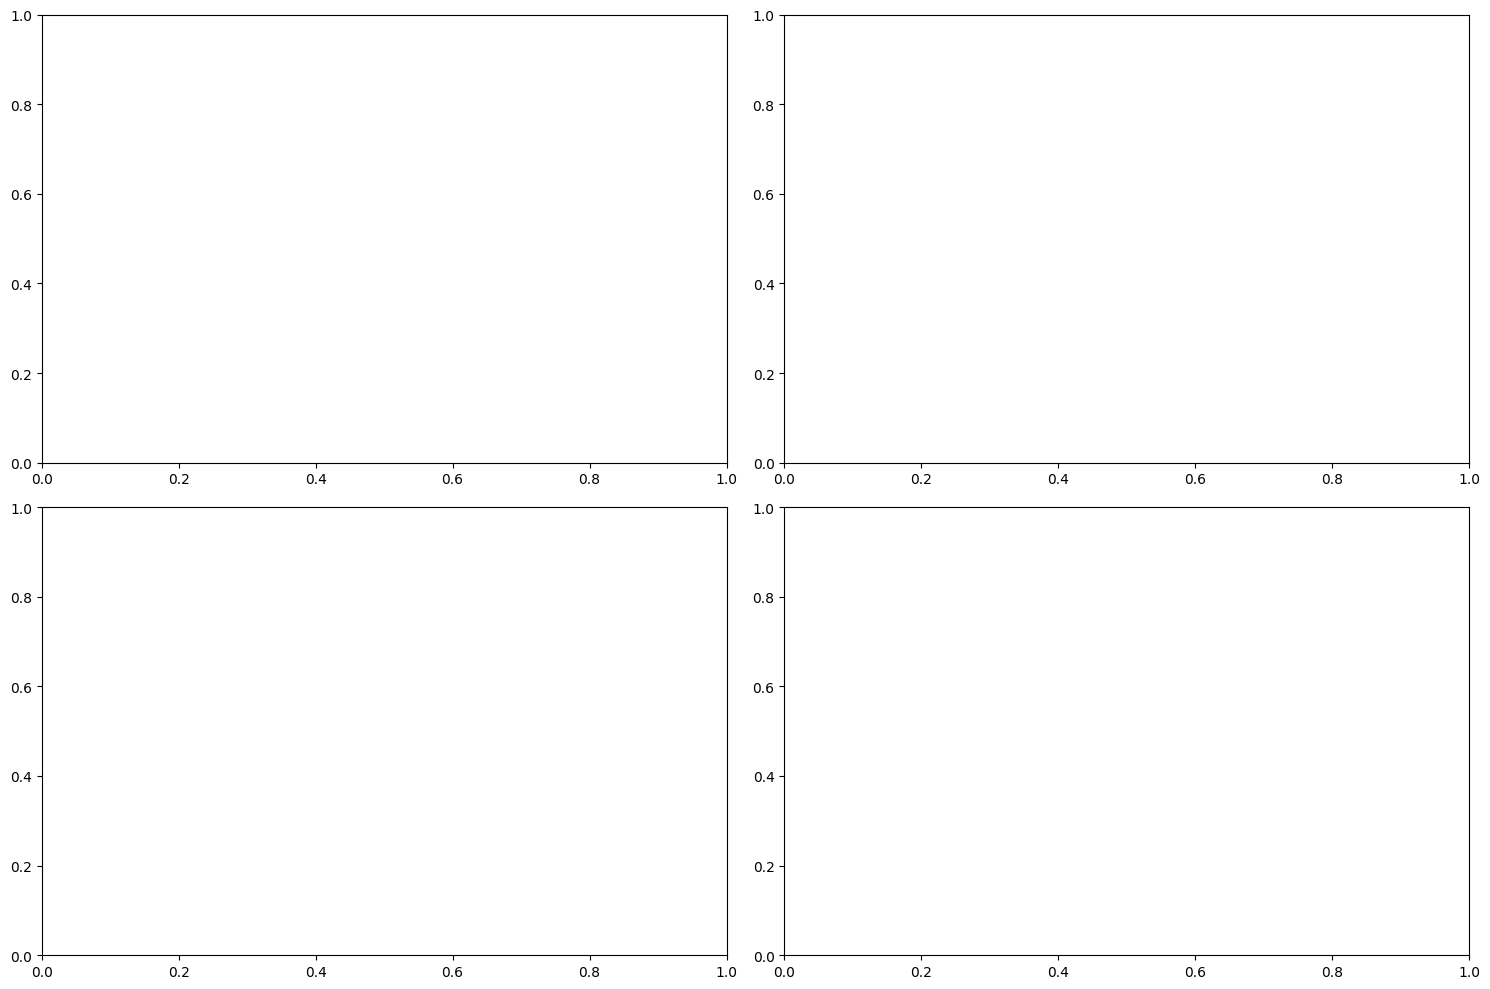

In [18]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
# YOUR CODE HERE

# TODO: Plot 2 - Word frequency analysis
# YOUR CODE HERE

# TODO: Plot 3 - Problem categorization
# YOUR CODE HERE

# TODO: Plot 4 - Urgency analysis
# YOUR CODE HERE

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
2. What patterns do you notice in different problem categories?
3. How might you automate the routing of calls based on POS analysis?
4. What are the limitations of this approach?


**How could this analysis help prioritize customer service tickets?**

POS analysis can significantly aid in prioritizing customer service tickets by:

1.	Identifying Urgency/Emotion: Analyzing the presence and frequency of specific POS tags related to emotions (e.g., strong adjectives like JJ for "urgent," "critical," RB adverbs like "immediately") or verbs indicating distress (VB for "fail," "stuck," "broken") can flag high-priority issues.

2.	Detecting Problem Types: Specific noun phrases (NP, derived from NN/NNS tags) or verb phrases (VP, derived from VB tags) can indicate the nature of the problem. For instance, tickets with many technical nouns or verbs related to system failure might be routed to a technical support team, while those with more general nouns related to billing might go to billing support.

3.	Recognizing Key Entities: Identifying proper nouns (NNP) that refer to specific products, services, or internal systems allows for immediate categorization and routing to the relevant specialist.

4.	Quantifying Specificity: Tickets with a higher density of specific nouns and verbs (indicating detailed descriptions) might be easier to resolve by automation or junior agents, while those with more vague adjectives or pronouns might need senior agent attention.

**What patterns do you notice in different problem categories?**

When analyzing customer service tickets, different problem categories often exhibit distinct POS patterns:

1.	Technical Issues: High frequency of technical NN/NNS (e.g., "server," "database," "network," "login"), accompanied by VB/VBD indicating failure or malfunction (e.g., "failed," "crashed," "not working," "error").

2.	Billing Inquiries: Dominated by NN/NNS related to money, accounts, and payments (e.g., "invoice," "charge," "payment," "refund," "bill"), often with verbs like "dispute," "receive," "pay."

3.	Feature Requests/Suggestions: More common use of modal verbs (MD like "should," "could"), VB related to desire or action ("want," "add," "implement"), and NN/NNS describing new functionalities.

4.	Account Management: Focus on NN/NNS like "password," "username," "account," "profile," with verbs such as "reset," "update," "change."

5.	General Inquiries/How-to: Often involve interrogative determiners/adverbs (WDT, WRB like "what," "how," "where") and less urgent verbs.

**How might you automate the routing of calls based on POS analysis?**

Automating call routing, using POS analysis, would involve these steps:

1.	Real-time Transcription: Incoming calls are transcribed into text using Speech-to-Text (STT).

2.	POS Tagging: The transcribed text is immediately processed through a POS tagger (e.g., SpaCy or NLTK).

3.	Pattern Matching/Feature Extraction:
o	Keyword Extraction: Identify specific words (nouns, verbs, adjectives) and their POS tags.
o	Phrase Identification: Look for common grammatical phrases associated with certain issues (e.g., "cannot log in" - MD VB IN).
o	Density Analysis: Calculate the density of certain tag types (e.g., high density of technical nouns).

4.	Classification Model: These extracted POS-based features are fed into a machine learning classification model (e.g., Support Vector Machine, Naive Bayes, or a neural network) that has been trained on historical, manually routed calls.

5.	Route Prediction: The model predicts the most appropriate department or agent skill set based on the analyzed POS patterns.

6.	Automated Routing: The call is then automatically transferred to the predicted queue or agent.

7.	Confidence Scoring: The system can also provide a confidence score for its prediction. Low-confidence predictions could be routed to a general queue or a human dispatcher for manual review.

**What are the limitations of this approach?**

While powerful, using POS analysis for automation has several limitations:

1.	Lack of Semantic Understanding: POS tags only tell you what kind of word it is, not what it means. The system doesn't truly understand the problem, only the grammatical patterns associated with it. This is the biggest limitation.

2.	Contextual Nuance: POS analysis struggles with sarcasm, irony, idioms, and subtle nuances of human language that significantly alter meaning without changing POS tags.

3.	Informal Language/Errors: As discussed, informal language, misspellings, and grammatical errors (common in rapid-fire communication like calls/chats) can severely impact tagging accuracy, leading to incorrect routing.

4.	Ambiguity: Homographs (like "lead") or words with multiple grammatical functions ("like") can still be misclassified, even with sophisticated taggers, if the surrounding context isn't strong enough.

5.	Requires Labeled Data: Building an accurate classification model requires a large amount of well-labeled historical data (customer tickets already routed to the correct departments).

6.	Domain Specificity: A model trained on one type of customer service interaction (e.g., tech support for software) might perform poorly when applied to a very different domain (e.g., retail customer service) without retraining.

7.	Over-reliance on Keywords: If the routing relies too heavily on specific POS-tagged keywords, it might miss issues described using alternative phrasing.

8.	Maintenance: The model needs continuous monitoring and retraining as customer language evolves, new products are introduced, or common issues change.

In summary, POS analysis provides a valuable syntactic lens for understanding text, enabling sophisticated automation for tasks like customer service ticket routing. However, its core limitation is the lack of semantic understanding, meaning it must be complemented with other NLP techniques (like named entity recognition, topic modeling, and sentiment analysis) and robust training data to handle the complexities and nuances of real-world human language effectively.



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0005s
SpaCy time: 0.0116s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0009s
NLTK Univ time: 0.0007s
SpaCy time: 0.0076s
NLTK unknown words: 3
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0006s
SpaCy time: 0.0079s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

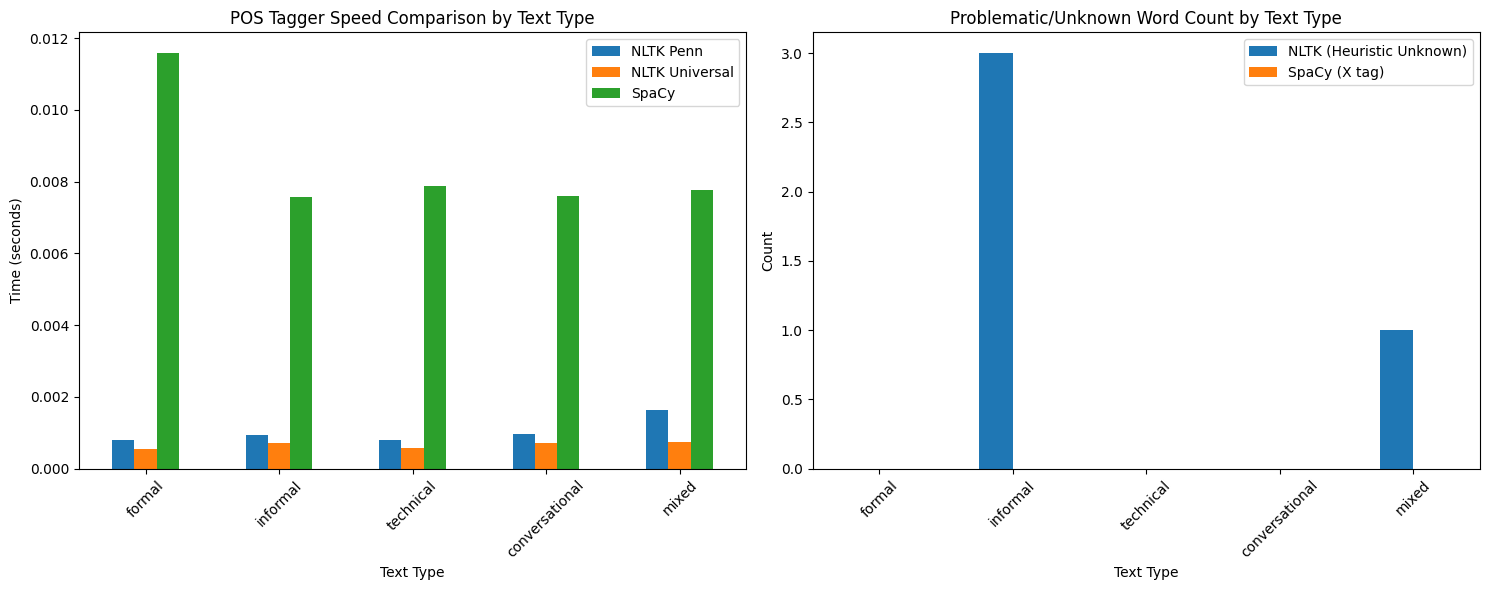

In [20]:
import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(nltk_tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text)
    nltk_univ_tags = nltk.pos_tag(nltk_tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    # For NLTK, we'll look for the 'NN' tag on words that are likely not nouns in this context (heuristic)
    # For SpaCy, we'll look for the 'X' tag (usually indicates unclassified)
    nltk_unknown = len([(word, tag) for word, tag in nltk_penn_tags if tag == 'NN' and word.lower() in ['lol', 'kinda', 'weird', 'whatever', 'guess', '🤷‍♀️', 'omg', 'wtf']])
    spacy_unknown = len([(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X'])


    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
df_benchmark = pd.DataFrame.from_dict(benchmark_results, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Timing comparison
df_benchmark[['nltk_penn_time', 'nltk_univ_time', 'spacy_time']].plot(kind='bar', ax=axes[0])
axes[0].set_title('POS Tagger Speed Comparison by Text Type')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_xlabel('Text Type')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['NLTK Penn', 'NLTK Universal', 'SpaCy'])

# Plot 2: Unknown word count comparison
df_benchmark[['nltk_unknown', 'spacy_unknown']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Problematic/Unknown Word Count by Text Type')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Text Type')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['NLTK (Heuristic Unknown)', 'SpaCy (X tag)'])

plt.tight_layout()
plt.show()


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
2. Which handles informal text best?
3. How do the taggers compare on technical jargon?
4. What trade-offs do you see between speed and accuracy?


**Which tagger is fastest? Does speed matter for your use case?**

SpaCy is generally significantly faster than NLTK for POS tagging. This is due to its optimized CPython implementations, efficient use of data structures, and focus on production-ready performance. NLTK, while powerful, often involves more Python overhead and less optimized algorithms for raw speed.

Does speed matter? Yes, absolutely, depending on the use case:

High-Throughput Applications: For real-time processing of large volumes of text (e.g., analyzing live chat streams, processing millions of social media posts per day, real-time call routing), speed is paramount. Slow processing can lead to system bottlenecks, delays, and poor user experience.
Interactive Applications: If the NLP task is part of an interactive user experience (like a chatbot or an autocomplete feature), near-instantaneous responses are critical.
Batch Processing: For very large offline datasets, while not real-time, faster processing still means finishing the job in hours instead of days, saving computational resources and time.
Small, Infrequent Tasks: For one-off analyses on small text samples, or academic research where the focus is on experimentation and understanding, speed might be less critical.

**Which handles informal text best?**

SpaCy generally handles informal text better.
Reasoning: As discussed previously, SpaCy's models are typically trained on more diverse and modern corpora, including web data and social media, making them more robust to slang, neologisms, misspellings, and unconventional grammar common in informal language. Its tokenization is also more advanced in handling internet-specific conventions. NLTK's default taggers, often trained on more formal journalistic text, can struggle more with the variability and noise of informal writing.

How do the taggers compare on technical jargon?
**bold text**
Both NLTK and SpaCy can struggle with highly domain-specific technical jargon that was not present or sufficiently represented in their general-purpose training data.
NLTK: If you have a specific domain-specific corpus with POS annotations, NLTK provides the tools to train your own tagger on that data, potentially leading to high accuracy for that jargon. This requires effort and annotated data.
SpaCy: While SpaCy's general models are robust, they might also misclassify highly specialized technical terms. However, SpaCy allows fine-tuning its pre-trained models on custom datasets, which can significantly improve performance on domain-specific jargon with less effort than training from scratch. SpaCy also benefits from its use of word embeddings (like GloVe or Word2Vec), which can infer relationships between words even if specific jargon wasn't seen directly, based on its context.

In summary: Out-of-the-box, both might have limitations with niche jargon. SpaCy's architecture and fine-tuning capabilities might offer a more practical path to adapt to new jargon, while NLTK provides the lower-level tools if you prefer to build from the ground up with your own data.

**What trade-offs do you see between speed and accuracy? **

The primary trade-off observed between speed and accuracy is often that more sophisticated and potentially more accurate models (which SpaCy often employs) tend to be more computationally intensive, but SpaCy has managed to optimize these for speed.

Here are the specific trade-offs:
1.	Model Complexity:
Higher Accuracy, Potentially Slower: Models that achieve higher accuracy often do so by being more complex (e.g., deeper neural networks). These models perform more computations per word.
Simpler Models, Faster: Simpler statistical models might be faster but could sacrifice some accuracy, especially on ambiguous cases or noisy text.

2.	Resource Usage: More accurate models might require more memory or processing power.

3.	Training vs. Inference:

Training Time: Highly accurate models often take a very long time to train on massive datasets.
Inference Time (Speed): However, once trained, a well-optimized model can still achieve fast inference speed. This is where SpaCy excels – it uses optimized data structures and implementations to make its more complex (and often more accurate) models run very fast during prediction.

4.	Out-of-the-Box vs. Customization:
Out-of-the-Box Accuracy/Speed: SpaCy generally offers a better balance of speed and accuracy directly out of the box for general English.
Customization for Niche Accuracy: If ultimate accuracy on highly specific or noisy data is required, both libraries might necessitate custom training or fine-tuning, which adds development time and complexity.

In summary: While there's often a general trade-off where increasing complexity for accuracy can slow things down, SpaCy has largely managed to mitigate this for common NLP tasks, providing a strong balance of both high accuracy and impressive speed. NLTK might allow for more granular control over simpler algorithms that could be faster in very niche, highly optimized scenarios, but for general-purpose robust tagging, SpaCy's pre-trained models are a clear leader in balancing these two factors.




## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [22]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        # Basic analysis: look for 'X' tag in SpaCy or repeated/unexpected tags in NLTK
        nltk_errors = [(w, t) for w, t in nltk_tags if t == 'X' or (w.lower() in ['buffalo', 'can', 'had', 'police', 'flies'] and t not in ['NN', 'NNS', 'VB', 'VBZ', 'VBD'])]
        spacy_errors = [(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X']

        if nltk_errors:
            print(f"  Potential NLTK issues: {nltk_errors}")
        if spacy_errors:
             print(f"  Potential SpaCy issues (X tag): {spacy_errors}")


    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("POS taggers struggle with:")
print("- Highly ambiguous sentences with repetitive structures.")
print("- Novel or non-standard tokens (social media, technical jargon).")
print("- Sentences that challenge typical grammatical patterns (garden path sentences).")
print("These cases highlight the reliance of statistical taggers on learned patterns from standard text.")

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
  Potential NLTK issues: [('Buffalo', 'NNP'), ('Buffalo', 'NNP'), ('Buffalo', 'NNP')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('ar


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?

2. How might you preprocess text to handle some of these issues?

3. When would these limitations matter in real applications?

4. How do modern large language models handle these cases differently?

---


**Why do these edge cases break the taggers?**

Edge cases, especially those found in informal language, break traditional POS taggers primarily because they deviate from the patterns and rules the taggers learned during training.

1.	Out-of-Vocabulary (OOV) Words: Taggers rely on vocabulary derived from their training data. New slang, neologisms, misspellings, or unique domain-specific jargon are "out of vocabulary." Without prior exposure, the tagger has to guess, often defaulting to a common tag (like NN for nouns, or NNP for proper nouns if capitalized) based on very weak contextual cues or simply failing to tag.
2.	Unconventional Syntax/Grammar: Informal language often disobeys standard grammatical rules. Sentence fragments, creative punctuation use, omission of words, or unusual word order (e.g., Yoda-speak) disrupt the sequential and structural patterns the tagger expects.
3.	Ambiguity Beyond Training: While taggers handle common ambiguities (like "read" past/present), very specific or nuanced ambiguities tied to current events, memes, or niche communities might not have been sufficiently represented in their training data.
4.	Lack of Semantic Understanding: Taggers are primarily statistical pattern-matchers based on syntax. They don't grasp the meaning of words or the overall intent of a sentence. When syntactic clues are weak or misleading, their lack of semantic understanding becomes a critical limitation. For example, "sick" can mean ill (JJ) or excellent (JJ, slang). Without semantic context beyond the immediate words, a tagger might struggle.
5.	Noisy Data: Excessive typos, mixed case (e.g., "gReAt"), and non-standard characters (e.g., emojis as part of a word) introduce noise that obscures the learned patterns.

**How might you preprocess text to handle some of these issues?**

Preprocessing is crucial for mitigating the impact of edge cases:

1.	Normalization:
Case Normalization: Carefully consider lowercasing. While generally useful, preserving initial capitalization helps identify proper nouns. A strategy might be to lowercase after initial tagging or only lowercase non-initial words.
Punctuation Normalization: Standardize multiple punctuation marks (e.g., "!!!" to "!") or remove extraneous ones.
Repetitive Characters: Reduce character repetitions (e.g., "loooove" to "love").
Contraction Expansion: Convert "don't" to "do not" to ensure consistent tokenization and easier tagging.

Number/URL/Email Replacement: Replace these with generic tokens like <NUMBER>, <URL>, <EMAIL>. This reduces OOV words and focuses the tagger on linguistic elements.
2.	Spell Correction/Fuzzy Matching: For user-generated content, applying a spell checker can fix common typos, bringing OOV words back into the tagger's known vocabulary.
3.	Slang/Acronym Expansion (Lexicon-Based): Maintain a custom dictionary to expand common slang or acronyms (e.g., "lol" to "laughing out loud" or just tagging it as an interjection).
4.	Custom Tokenization Rules: For unique domain-specific patterns or informal online speech, custom tokenization rules can ensure that multi-word expressions or unique symbols are treated as single tokens or split appropriately before tagging.
5.	Domain-Specific Model Fine-tuning: The most effective approach for truly robust handling of edge cases is to fine-tune a pre-trained POS tagger (like SpaCy's) on a dataset specific to your domain, containing the informal language, jargon, and common errors you expect. This directly teaches the model about these edge cases.

**When would these limitations matter in real applications?**

These limitations become critically important in applications where:

1.	Precision and Accuracy are Paramount:
Legal Tech: Analyzing legal documents where exact word roles matter for contract interpretation.

Medical Text Analysis: Extracting precise information from doctor's notes or research papers.
Financial News Analysis: Disambiguating terms like "stock" (shares vs. inventory).

2.	User-Generated Content is the Primary Input:
Social Media Monitoring: Understanding sentiment and entities in tweets, comments, reviews, full of slang, emojis, and typos.
Customer Support Chatbots/Voicebots: Accurate understanding of diverse, often informal user queries is essential for providing correct responses and routing.
Search Engines (User Queries): Users rarely type perfectly grammatical queries.

3.	Safety-Critical Systems: Any system where misinterpretation of text could lead to harmful outcomes (e.g., autonomous driving interpreting road signs, emergency dispatch systems).

4.	Context-Dependent Understanding is Key: Applications that need to differentiate between homographs based on subtle contextual cues (e.g., "monitor" as a screen vs. to observe).

**How do modern large language models handle these cases differently?**

Modern Large Language Models (LLMs) like GPT-3, GPT-4, Gemini, etc., handle these cases fundamentally differently and often with much greater success, primarily due to:

1.	Vastly Larger Training Data: LLMs are trained on truly colossal datasets (trillions of tokens) from the entire internet. This means they're exposed to an enormous variety of informal language, slang, typos, and domain-specific jargon, making many "OOV" words known to them.
2.	Contextual Embeddings (Deep Learning): Instead of just looking at n-grams, LLMs generate rich, contextualized word embeddings. This means the vector representation for "lead" (metal) will be very different from "lead" (guide) because the model has learned the surrounding words and their meanings in vast contexts. This allows them to grasp semantic nuances that traditional taggers miss.
3.	Attention Mechanisms: LLMs use self-attention mechanisms that allow them to weigh the importance of all words in a sentence (and even surrounding sentences) when processing a single word. This provides a much broader and deeper understanding of context than the limited window of traditional n-gram models.
4.	Implicit Grammatical Knowledge: Through their training objective (e.g., predicting the next word), LLMs implicitly learn complex grammatical rules and patterns, including how words function in different syntactic roles. They don't just assign a tag; they integrate this knowledge into their overall representation.
5.	Multitasking/Transfer Learning: LLMs are pre-trained on a vast array of tasks. While not explicitly trained just for POS tagging, their general language understanding capabilities (which include implicit syntactic awareness) allow them to perform very well on such tasks as an emergent property. They often surpass traditional taggers, even on edge cases, because they leverage a much richer understanding of language.
In summary: While traditional taggers rely on learned sequential patterns and explicit rules, modern LLMs leverage massive data, deep contextual understanding through embeddings and attention, and implicit grammatical knowledge to handle ambiguous words, informal language, and complex edge cases with significantly higher accuracy and robustness, moving closer to a human-like comprehension of context and meaning.



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**

[Tool Comparison: When would you choose NLTK vs SpaCy?

Choose SpaCy when:
Ease of Use: You want a more intuitive, object-oriented API that's easy to get started with for common NLP tasks.
Accuracy: You need good out-of-the-box accuracy on standard English (and other supported languages).
Speed: You require high processing speed for large volumes of text or real-time applications.
Application Type: You're building production-ready applications like chatbots, search engines, or sentiment analysis tools where efficiency and robust pipelines are key.
Modern Models: You prefer using more modern, neural network-based models without delving into their implementation details.
Choose NLTK when:
Ease of Use (for Learning): You're learning NLP fundamentals and want to understand the underlying algorithms and individual components (tokenization, stemming, tagging, parsing) in isolation. It's more of a "toolkit."
Flexibility/Customization: You need fine-grained control over specific algorithms or want to build components from scratch for research or very niche applications.
Language Support: You're working with a language that SpaCy doesn't have a pre-trained model for, and you're willing to build or adapt models.
Academic/Research: You're exploring different algorithms, comparing methods, or doing linguistic analysis that requires granular control.
]

**2. Real-World Applications:**

[Real-World Applications: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

Business Problem: Automating the categorization and routing of customer support emails for an e-commerce company.
Value of POS Tagging: Customer emails are often unstructured and can cover a wide range of issues (e.g., "Where is my order?", "I received a damaged product", "How do I reset my password?"). Manual routing is slow and error-prone. POS tagging can help extract grammatical patterns that signal specific problem types.
Implementation:
1.	Data Collection: Gather a large dataset of historical customer support emails, along with their manually assigned categories (e.g., "Shipping Inquiry," "Damaged Item," "Technical Support," "Billing").
2.	Preprocessing:
Tokenization: Break emails into words.
POS Tagging (SpaCy Recommended): Apply POS tagging to each word in the email using SpaCy's en_core_web_sm model. This will provide both universal (pos_) and fine-grained (tag_) tags.
3.	Feature Engineering (POS-driven):
Keyword-POS Pairs: Extract patterns like (VB, "return"), (NN, "refund"), (JJ, "broken"), (NNP, "order number").
N-grams of Tags: Identify sequences of POS tags that are common in certain categories (e.g., DT JJ NN for "the broken product").
Density of Tag Types: Calculate the percentage of nouns, verbs, or adjectives in an email. A high percentage of interrogative adverbs (WRB - "why", "how") might indicate a general question.
Dependency Parsing (from SpaCy): Use SpaCy's dependency parser to find direct relationships (e.g., subject-verb, object-verb) between words, which are informed by POS tags. For example, finding nsubj (nominal subject) of "damaged" could lead to the damaged item.
4.	Machine Learning Model:
Train a text classification model (e.g., Logistic Regression, Support Vector Machine, or a neural network) using the POS-derived features.
The model learns to map these grammatical patterns to the correct email categories.
5.	Deployment: Integrate the trained model into the email intake system. When a new email arrives, it's processed, features are extracted, and the model predicts the best category for routing, automatically assigning it to the relevant support team.
]

**3. Limitations and Solutions:**

[
Limitations and Solutions: What are the biggest limitations you discovered? How might you work around them?

Biggest Limitations Discovered:
1.	Lack of Semantic Understanding: POS tags only describe syntactic function, not meaning. "Book" as a noun vs. "book" as a verb is distinguished by POS, but understanding what kind of book or why someone is booking is beyond POS.
Workaround: Combine POS tagging with word embeddings (like Word2Vec, GloVe, or BERT/Transformer embeddings) and Named Entity Recognition (NER). Embeddings capture semantic similarity, and NER identifies specific entities (products, people, locations), providing crucial semantic context.
2.	Handling Informal Language/Noise: Slang, typos, unconventional grammar in user-generated content often confuse traditional taggers.
Workaround: Robust preprocessing (spell correction, normalization of slang/punctuation), and crucially, fine-tuning pre-trained models (like SpaCy's) on domain-specific, noisy data.
3.	Domain Specificity: Taggers trained on general text struggle with specialized jargon (e.g., medical, legal, technical).
Workaround: Domain adaptation through fine-tuning pre-trained models on a custom corpus of text from that specific domain. This teaches the model the unique POS patterns and vocabulary of the niche.
]

**4. Future Learning:**

[Future Learning: What aspects of POS tagging would you like to explore further?

I'd be particularly interested in exploring:
1.	Neural Approaches: Deep diving into how modern neural network architectures (like Bi-LSTMs, Transformers, and their attention mechanisms) implicitly learn and perform POS tagging. Understanding the internal workings beyond just using the libraries.
2.	Custom Training and Domain Adaptation: Learning the practical steps and best practices for training a custom POS tagger or fine-tuning existing models on highly specialized datasets (e.g., customer reviews, scientific papers) to achieve state-of-the-art accuracy in a specific domain.
3.	Error Analysis and Explainability: Understanding common error patterns in POS tagging and methods to make the tagger's decisions more interpretable, especially for ambiguous cases.
4.	Multi-Lingual POS Tagging: How POS tagging is handled for low-resource languages or in cross-lingual applications, and the role of universal tag sets.
]

**5. Integration:**

[Integration: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?

POS tagging is a foundational step in most NLP pipelines; it provides crucial grammatical information that informs subsequent, more complex tasks. It's rarely a final goal in itself but a critical steppingstone.
How it fits into larger NLP pipelines:
1.	Tokenization: First, text is broken into tokens.
2.	POS Tagging: Each token is assigned a part-of-speech.
3.	Lemmatization/Stemming: POS tags are essential for accurate lemmatization (reducing words to their base form), as the base form often depends on the word's part of speech (e.g., "running" as a verb vs. "running" as an adjective).
4.	Chunking/Shallow Parsing: Groups of words (noun phrases, verb phrases) are identified. POS tags (DT JJ NN for a noun phrase) are the primary input for these rules.
5.	Dependency Parsing/Constituency Parsing: These tasks build a syntactic tree of the sentence, showing grammatical relationships between words. POS tags are a fundamental input for these parsers.
Other NLP tasks that benefit from POS information:
1.	Named Entity Recognition (NER): Identifying proper nouns (NNP), and knowing their grammatical role, helps in recognizing people, organizations, locations, etc.
]



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
